In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
data = np.loadtxt("data.txt")

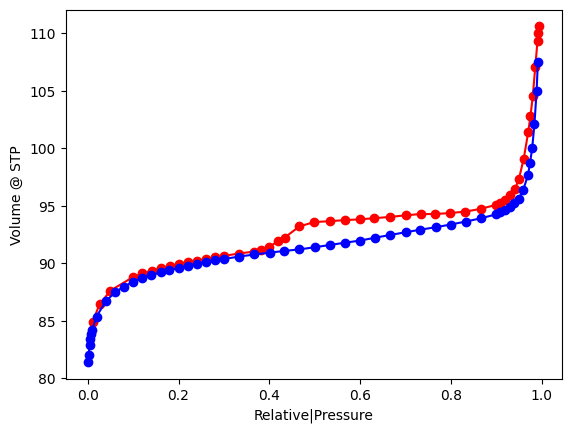

In [3]:
p,a=np.split(data,2,axis=1)
plt.ylabel('Volume @ STP')
plt.xlabel('Relative|Pressure')
a_max = np.argmax(a)
plt.plot(p[a_max:], a[a_max:], marker='o', c='r')
plt.plot(p[:a_max], a[:a_max], marker='o', c='b')
plt.show()

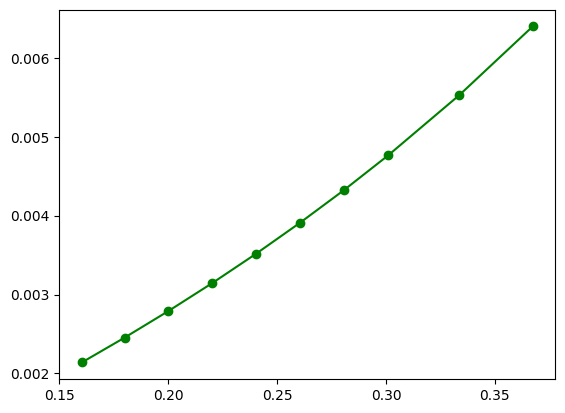

In [4]:
new_y = p/(a*(1-p))
N = 23
plt.plot(p[13:N], new_y[13:N], marker='o', c='g')
plt.show()

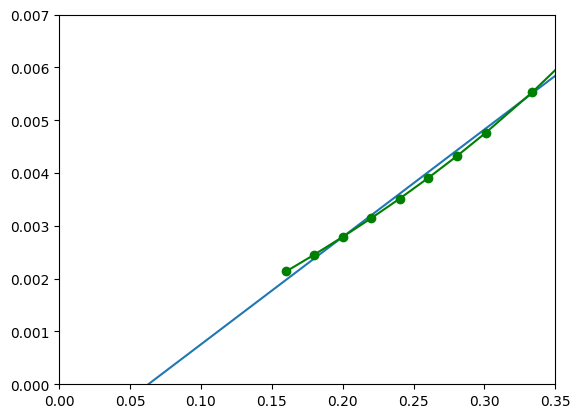

Line 0.02034625481917238*x + -0.001278817696806581
R value 0.9932943305668016


In [42]:
def lin_reg(N0, N):
    model = LinearRegression()
    model.fit(p[N0:N], new_y[N0:N])
    r = model.score(p[N0:N], new_y[N0:N])
    k = model.coef_[0][0]
    b = model.intercept_[0]
    return k, b, r
k, b, r = lin_reg(13, N)
plt.xlim(0, 0.35)
plt.ylim(0, 0.007)
plt.plot([0, 1], [b, k + b], marker = 'o')
plt.plot(p[13:N], new_y[13:N], marker='o', c='g')
plt.show()
print(f"Line {k}*x + {b}")
print(f"R value {r}")

In [36]:
def calc_consts(k, b):
    c = k/b + 1
    am = 1 / (b*c) /22.4*10**-3
    Na =  6.022140 * (10**23)
    wm = 16.2 * (10**-20)
    As = Na * am * wm
    return am, c, As
am, c, As = calc_consts(k, b)
print(f"A = {As}")
print(f"Am = {am}\nC = {c}")

A = 228.41547349133424
Am = 0.002341313982385802
C = -14.910207428299076


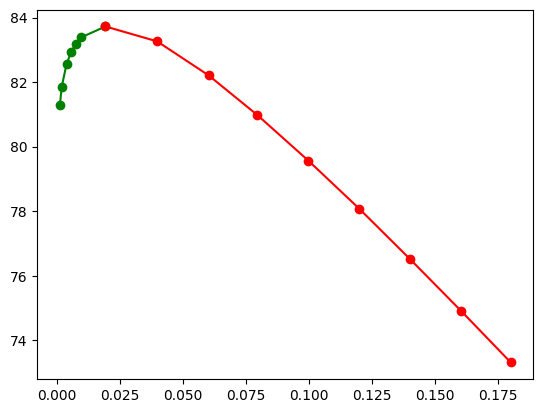

P/P0 max = [0.0192936]


In [30]:
P0 = 1
Rokkel_y = a * P0 * (1 - p)
Rokkel_y_max = np.argmax(Rokkel_y[:int(len(Rokkel_y)/2)])
plt.plot(p[:Rokkel_y_max+1], Rokkel_y[:Rokkel_y_max+1], marker='o', c='g')
plt.plot(p[Rokkel_y_max:15], Rokkel_y[Rokkel_y_max:15], marker='o', c='r')
plt.show()
print(f"P/P0 max = {p[Rokkel_y_max]}")

№1) с = 22109.48412717324
Line 0.011946369125772724*x + 5.403522492566373e-07

№2) с = 18827.17541007323
Line 0.011933711664842266*x + 6.338893272213406e-07

№3) с = 14809.572644508029
Line 0.011911535791068587*x + 8.043675833596393e-07

№4) с = 12951.700519193031
Line 0.011897831834994956*x + 9.187017966605192e-07

№5) с = 11878.860316263701
Line 0.011888690758697374*x + 1.0009118176292108e-06



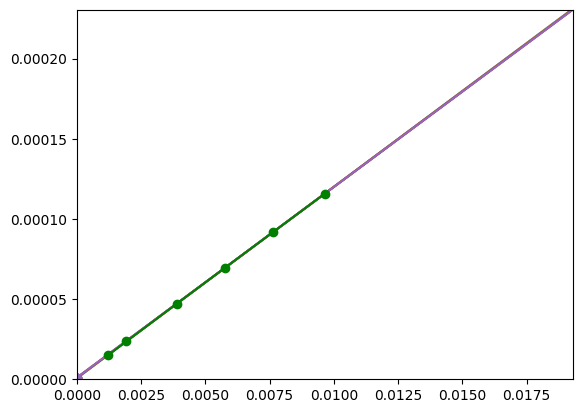

In [44]:
plt.xlim(0, p[Rokkel_y_max])
plt.ylim(0, new_y[Rokkel_y_max])
for i, p_min in enumerate(p[:Rokkel_y_max-1]):
    k, b, r = lin_reg(i, Rokkel_y_max)
    am, c, As = calc_consts(k, b)
    
    plt.plot([0, 1], [b, k + b], marker = 'o')
    print(f"№{i+1}) с = {c}")
    print(f"Line {k}*x + {b}\n")
    


# k, b, r = lin_reg(Rokkel_y_max)
# plt.xlim(0, p[Rokkel_y_max])
# plt.ylim(0, new_y[Rokkel_y_max])

plt.plot(p[:Rokkel_y_max], new_y[:Rokkel_y_max], marker='o', c='g')
plt.show()
# print(f"Line {k}*x + {b}")
# print(f"R value {r}")
# calc_consts(k, b)